# Introduction to AI
Dit notebook is bedoeld om te laten zien hoe het modelleer proces in zijn werk gaat. Dit is een jupyter notebook waarin we python-code kunnen runnen (uitleg hierover volgt in week 2)

## Supervised learning - werkwijze:

0. Zorg voor goede data (uitleg volgt in week 2)
1. kies een modeltype (we kiezen nu een random forest -> uitleg volgt in week 3)
2. kies de juiste hyperparameters (we nemen nu de default -> uitleg volgt in week 5)
3. definieer een dataframe met de features en een met de target variabele
4. Split data in train/validatie(/test) (uitgebreide uitleg volgt in week 5)
5. train het model
6. Voorspel op nieuwe data
7. Kijk hoe goed het model presteert
8. herhaal!

Daarna: implementatie!

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
titanic = pd.read_csv('../data/titanic.csv')

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Stap 0.** Zorg voor goede data

In [67]:
titanic = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Survived']]

In [68]:
titanic = titanic.dropna()

**Stap 1 + Stap 2.** kies model type en kies hyperparameters\
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [71]:
model = tree.DecisionTreeClassifier()

**Stap 3.** definieer dataframe met features en target variabele

In [69]:
X = titanic.drop('Survived', axis = 1)

In [70]:
y = titanic[['Survived']]

**Stap 4.** Split data in train/validatie(/test) set

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

**Stap 5.** train het model

In [73]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

**Stap 6.** Voorspel op test set

In [74]:
y_pred = model.predict(X_test)

**Stap 7.** Kijk hoe goed het model presteert

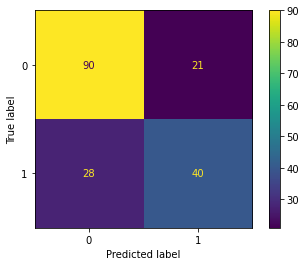

In [75]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [94]:
accuracy_score(y_test,y_pred)

0.553072625698324

## Unsupervised learning - werkwijze:
0. Zorg voor goede data (uitleg volgt in week 2)
1. kies een modeltype (we kiezen nu k-means -> uitleg volgt in week 3)
2. kies de juiste hyperparameters (we nemen nu de default -> uitleg volgt in week 5)
3. definieer een dataframe met de features 
4. train het model
5. Voorspel op nieuwe data
6. Kijk hoe goed het model presteert
8. herhaal!

In [30]:
from sklearn import cluster
from sklearn import datasets
import seaborn as sns

In [17]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [18]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Stap 0** Zorg voor goede data (done!)

**Stap 1 + Stap 2** kies een modeltype (kmeans) en kies de juiste hyperparameters (n_clusters = 3)

In [22]:
model = cluster.KMeans(n_clusters = 3)

**Stap 3** Definieer dataframe met juiste features

In [23]:
X = iris_df

**Stap 4** Train het model

In [28]:
y_pred = model.fit_predict(iris_df)

**Stap 5** kijk hoe goed het model presteert

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

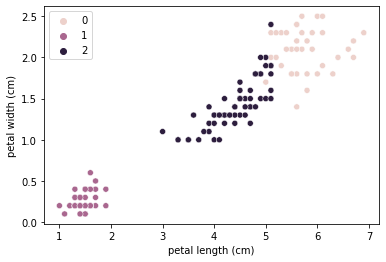

In [39]:
sns.scatterplot(x = iris_df['petal length (cm)'], y = iris_df['petal width (cm)'], hue = y_pred)

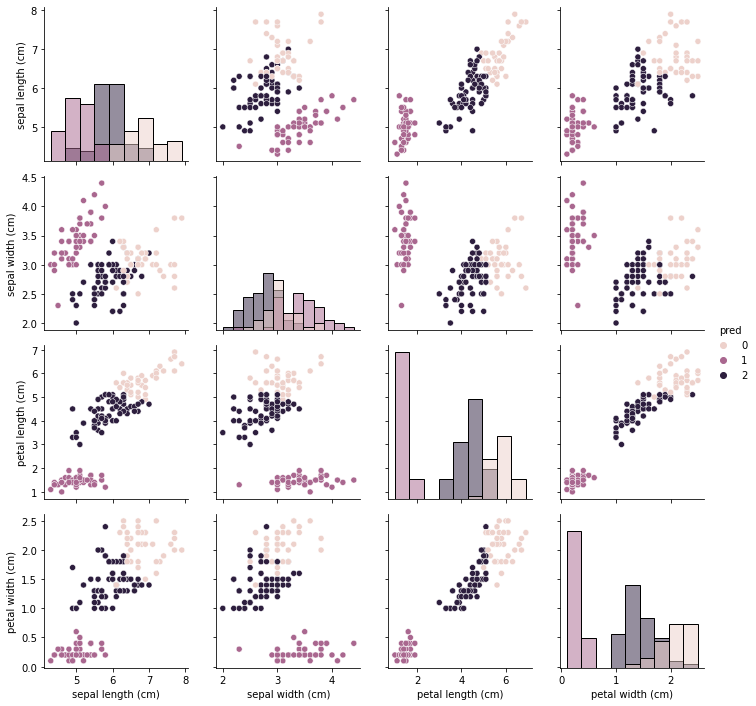

In [47]:
g = sns.PairGrid(iris_df, hue="pred")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

**Stap 6** pas toe op nieuwe data

In [40]:
model.predict([[5.3,4,1.7,0.4],[8,4,6,2]])

/Users/rianne/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int32)